In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

# 1. Overview and Import Data

In [3]:
income = pd.read_excel("income.xls")
house1 = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
house2 = pd.read_csv("Melbourne_housing_FULL.csv")

## 2. Income Data
### 2.1 Data Cleaning
Merged the suburb with detailed locations into the main suburb

In [4]:
income["Suburb"] = income["SA2 NAME"].str.split('-', 1, expand=True)[0]
income["State/ID"] = income["SA2"]
income["Earners 2012"] = income["2011-12"]
income["Earners 2013"] = income["2012-13"] 
income["Earners 2014"] = income["2013-14"]
income["Earners 2015"] = income["2014-15"]
income["Earners 2016"] = income["2015-16"]
income["Earners 2017"] = income["2016-17"] 
income["Earners 2018"] = income["2017-18"]

income["Median age 2012"] = income["2011-12.1"]
income["Median age 2013"] = income["2012-13.1"] 
income["Median age 2014"] = income["2013-14.1"]
income["Median age 2015"]  = income["2014-15.1"]
income["Median age 2016"] = income["2015-16.1"]
income["Median age 2017"]  = income["2016-17.1"] 
income["Median age 2018"] = income["2017-18.1"]

income["Median income 2012"] = income["2011-12.3"]
income["Median income 2013"] = income["2012-13.3"] 
income["Median income 2014"] = income["2013-14.3"]
income["Median income 2015"]  = income["2014-15.3"]
income["Median income 2016"] = income["2015-16.3"]
income["Median income 2017"]  = income["2016-17.3"] 
income["Median income 2018"] = income["2017-18.3"]

income["Mean income 2012"] = income["2011-12.4"]
income["Mean income 2013"] = income["2012-13.4"] 
income["Mean income 2014"] = income["2013-14.4"]
income["Mean income 2015"]  = income["2014-15.4"]
income["Mean income 2016"] = income["2015-16.4"]
income["Mean income 2017"]  = income["2016-17.4"] 
income["Mean income 2018"] = income["2017-18.4"]

### 2.2  Extracted data at state and suburb levels
Two datasts named 'Income_state_yr2011_18' and 'Income_Suburb_yr2011_18'generated 

State name/ Suburb, # of earners, median age, median yearly income, mean yealy income (from 2011-2018)

#### 2.2.1  Genarated State-Level Income Dataset

In [5]:
income.columns

Index(['SA2', 'SA2 NAME', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2011-12.1', '2012-13.1', '2013-14.1',
       '2014-15.1', '2015-16.1', '2016-17.1', '2017-18.1', '2011-12.2',
       '2012-13.2', '2013-14.2', '2014-15.2', '2015-16.2', '2016-17.2',
       '2017-18.2', '2011-12.3', '2012-13.3', '2013-14.3', '2014-15.3',
       '2015-16.3', '2016-17.3', '2017-18.3', '2011-12.4', '2012-13.4',
       '2013-14.4', '2014-15.4', '2015-16.4', '2016-17.4', '2017-18.4',
       'Unnamed: 37', 'Suburb', 'State/ID', 'Earners 2012', 'Earners 2013',
       'Earners 2014', 'Earners 2015', 'Earners 2016', 'Earners 2017',
       'Earners 2018', 'Median age 2012', 'Median age 2013', 'Median age 2014',
       'Median age 2015', 'Median age 2016', 'Median age 2017',
       'Median age 2018', 'Median income 2012', 'Median income 2013',
       'Median income 2014', 'Median income 2015', 'Median income 2016',
       'Median income 2017', 'Median income 2018', 'Mean 

In [9]:
Income_state_yr2011_18 = income[['State/ID','Earners 2012', 'Earners 2013',
       'Earners 2014', 'Earners 2015', 'Earners 2016', 'Earners 2017',
       'Earners 2018', 'Median age 2012', 'Median age 2013', 'Median age 2014',
       'Median age 2015', 'Median age 2016', 'Median age 2017',
       'Median age 2018', 'Median income 2012', 'Median income 2013',
       'Median income 2014', 'Median income 2015', 'Median income 2016',
       'Median income 2017', 'Median income 2018', 'Mean income 2012',
       'Mean income 2013', 'Mean income 2014', 'Mean income 2015',
       'Mean income 2016', 'Mean income 2017', 'Mean income 2018']]

In [10]:
Income_state_yr2011_18

,State/ID,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
0,Australia,12268900,12449976,12703715,13102895,13358252,13678024,14069082,42,42,...,47692,48360,49805,55559,58061,59802,61036,61975,62594,64246
1,New South Wales,3824011,3871906,3953705,4091347,4191542,4344997,4466941,42,42,...,48085,48700,50153,56932,59304,61340,62798,64493,65196,67200
2,101021007,1966,2025,2098,2133,2153,2262,2315,50,50,...,39716,41288,42003,42319,43579,44619,47741,51074,51090,51594
3,101021008,5026,4972,4789,4866,4937,4988,5059,42,42,...,55870,57880,59295,55144,57352,58792,59548,61093,62535,63790
4,101021009,6155,6139,6049,6194,6419,6486,6595,39,39,...,54999,55376,57848,55416,57650,58375,59310,60764,60958,62863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,801111140,311,340,334,349,289,347,364,39,38,...,62592,55384,61096,62653,58708,58541,62505,72858,70503,67445
2296,801111141,np,np,np,np,np,21,19,np,np,...,np,49981,58498,np,np,np,np,np,57309,56357
2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,Totals may not align with the sum of their com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
Income_state_yr2011_18 = Income_state_yr2011_18[Income_state_yr2011_18["State/ID"].str.contains ("Australia|Victoria|New South Wales|Queensland|Tasmania|Northern")== True]
Income_state_yr2011_18 

,State/ID,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
0,Australia,12268900,12449976,12703715,13102895,13358252,13678024,14069082,42,42,...,47692,48360,49805,55559,58061,59802,61036,61975,62594,64246
1,New South Wales,3824011,3871906,3953705,4091347,4191542,4344997,4466941,42,42,...,48085,48700,50153,56932,59304,61340,62798,64493,65196,67200
578,Victoria,3035381,3077528,3152222,3260682,3352403,3474938,3603810,42,42,...,46984,47709,49266,54193,55933,57668,59019,60350,61489,63442
1041,Queensland,2448420,2478208,2516080,2592850,2623526,2716386,2798990,41,42,...,46869,47425,48826,53611,56230,57492,58433,59056,59534,60819
1570,South Australia,880884,883722,895703,912863,916751,934737,957802,43,44,...,46110,46937,48354,50826,52676,54551,55586,56194,57157,58303
1743,Western Australia,1349170,1398762,1429386,1468898,1464653,1479554,1500199,41,41,...,52504,51450,52671,63391,67820,69445,70354,69133,67673,68865
1996,Tasmania,263709,260386,262705,268711,271680,279923,288240,44,45,...,43833,44437,45546,46677,48511,50056,51517,52259,52720,54145
2096,Northern Territory,109177,113257,117335,120713,120118,125654,126579,38,38,...,59466,58669,60636,59612,63157,65975,67910,70005,69438,71561
2165,Australian Capital Territory,229245,233592,237161,244720,248073,260871,269608,41,41,...,63061,63038,64332,65550,68311,69989,70807,73234,73326,74728


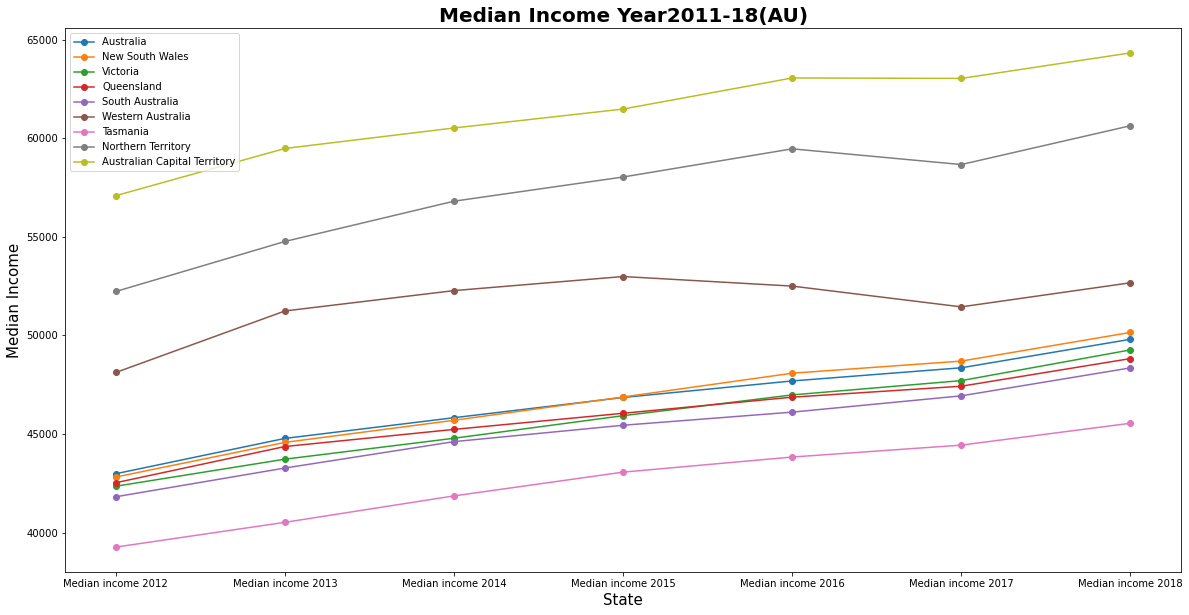

In [48]:
plt.subplots(figsize=(20,10))
for index, row in Income_state_yr2011_18.iterrows():
    plt.plot(['Median income 2012', 'Median income 2013', 'Median income 2014',
       'Median income 2015', 'Median income 2016', 'Median income 2017',
       'Median income 2018'],row[['Median income 2012', 'Median income 2013', 'Median income 2014',
       'Median income 2015', 'Median income 2016', 'Median income 2017',
       'Median income 2018']],"o-",label = row["State/ID"] )
    
plt.xlabel('State',fontsize=15)
plt.ylabel('Median Income',fontsize=15)
plt.title("Median Income Year2011-18(AU)",fontsize=20,fontweight="bold")
plt.legend()
plt.show()

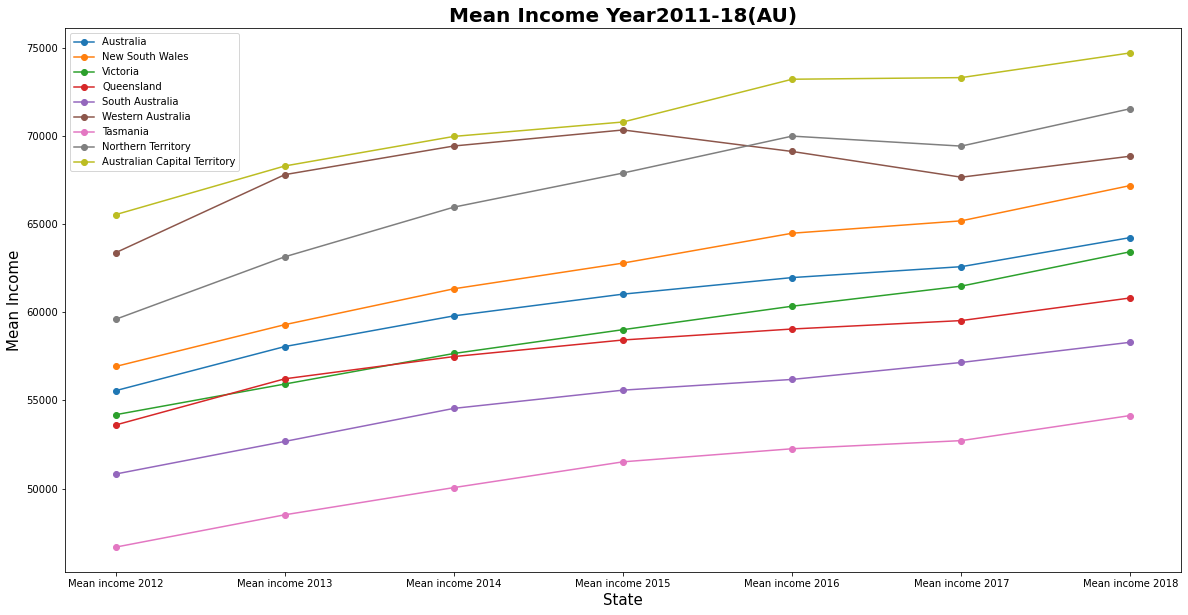

In [49]:
plt.subplots(figsize=(20,10))
for index, row in Income_state_yr2011_18.iterrows():
    plt.plot(['Mean income 2012', 'Mean income 2013', 'Mean income 2014',
       'Mean income 2015', 'Mean income 2016', 'Mean income 2017',
       'Mean income 2018'],row[['Mean income 2012', 'Mean income 2013', 'Mean income 2014',
       'Mean income 2015', 'Mean income 2016', 'Mean income 2017',
       'Mean income 2018']],"o-",label = row["State/ID"] )
    
plt.xlabel('State',fontsize=15)
plt.ylabel('Mean Income',fontsize=15)
plt.title("Mean Income Year2011-18(AU)",fontsize=20,fontweight="bold")
plt.legend()
plt.show()

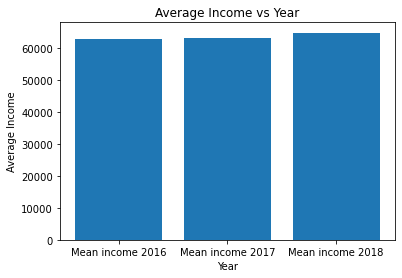

In [50]:
yearly_income = Income_state_yr2011_18[['Mean income 2016', 'Mean income 2017','Mean income 2018']].mean(axis=0)
plt.bar(['Mean income 2016', 'Mean income 2017','Mean income 2018'],yearly_income)
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title("Average Income vs Year")

plt.show()

#### 2.2.2  Genarated and Cleaned Suburb-Level Income Dataset

In [101]:
Income_suburb_yr2011_18 = income[['Suburb','Earners 2012', 'Earners 2013',
       'Earners 2014', 'Earners 2015', 'Earners 2016', 'Earners 2017',
       'Earners 2018', 'Median age 2012', 'Median age 2013', 'Median age 2014',
       'Median age 2015', 'Median age 2016', 'Median age 2017',
       'Median age 2018', 'Median income 2012', 'Median income 2013',
       'Median income 2014', 'Median income 2015', 'Median income 2016',
       'Median income 2017', 'Median income 2018', 'Mean income 2012',
       'Mean income 2013', 'Mean income 2014', 'Mean income 2015',
       'Mean income 2016', 'Mean income 2017', 'Mean income 2018']]

In [102]:
mycol= ["Suburb", "Earners 2012","Earners 2013","Earners 2014","Earners 2015","Earners 2016","Earners 2017","Earners 2018",
       "Median age 2012","Median age 2013","Median age 2014","Median age 2015","Median age 2016","Median age 2017","Median age 2018",
       "Median income 2012","Median income 2013","Median income 2014","Median income 2015","Median income 2016","Median income 2017","Median income 2018",
       "Mean income 2012","Mean income 2013","Mean income 2014","Mean income 2015","Mean income 2016","Mean income 2017","Mean income 2018"
       ]
income_suburb_yr2011_18 = pd.DataFrame(columns=mycol)

In [103]:
for i,k in income.groupby(["Suburb"]):
    temp = [i, k["Earners 2012"].values[0],k["Earners 2013"].values[0],k["Earners 2014"].values[0],k["Earners 2015"].values[0],k["Earners 2016"].values[0],k["Earners 2017"].values[0],k["Earners 2018"].values[0],
    k["Median age 2012"].values[0],k["Median age 2013"].values[0],k["Median age 2014"].values[0],k["Median age 2015"].values[0],k["Median age 2016"].values[0],k["Median age 2017"].values[0],k["Median age 2018"].values[0],
    k["Median income 2012"].values[0],k["Median income 2013"].values[0],k["Median income 2014"].values[0],k["Median income 2015"].values[0],k["Median income 2016"].values[0],k["Median income 2017"].values[0],k["Median income 2018"].values[0],
    k["Mean income 2012"].values[0],k["Mean income 2013"].values[0],k["Mean income 2014"].values[0],k["Mean income 2015"].values[0],k["Mean income 2016"].values[0],k["Mean income 2017"].values[0],k["Mean income 2018"].values[0]]
    listSeries = pd.Series(temp,index=mycol)
    income_suburb_yr2011_18 = income_suburb_yr2011_18.append(listSeries, ignore_index=True)

In [92]:
income_suburb_yr2011_18

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
0,ACT,311,340,334,349,289,347,364,39,38,...,62592,55384,61096,62653,58708,58541,62505,72858,70503,67445
1,APY Lands,221,198,163,162,169,150,203,40,38,...,25272,24617,27564,29782,37550,43257,39315,43260,42275,43107
2,Abbotsford,3265,3522,4629,5200,5625,6365,6439,35,34,...,57501,58359,61476,63043,65938,63884,65878,69588,72002,75384
3,Aberfoyle Park,7160,7126,7202,7240,7117,7187,7216,44,45,...,49303,49099,51227,49772,51870,53019,54213,55092,55464,57013
4,Acacia Gardens,2098,2168,2199,2283,2335,2357,2348,38,38,...,58727,58292,59702,57113,60087,60693,62417,63532,64678,66273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,Young,5323,5301,5269,5373,5437,5492,5534,44,44,...,40932,41325,43226,42473,45050,46408,48555,48936,49717,50854
2167,Young Region,3642,3659,3662,3697,3576,3821,3897,48,48,...,41399,41985,42688,42199,42635,43845,48250,50018,51290,51607
2168,Youngtown,2714,2666,2621,2711,2674,2685,2731,43,44,...,46771,46458,47926,48570,50607,52396,53341,55392,55192,56570
2169,Yuendumu,103,90,71,59,158,240,256,39,36,...,52490,48323,45772,35464,38528,42236,46034,55569,55466,57283


#### 2.2.2.1 Missing Data Clean

for all suburb data in AU

In [93]:
cleaned_income_suburb_full = income_suburb_yr2011_18.drop(income_suburb_yr2011_18[(income_suburb_yr2011_18["Mean income 2015"] == 'np') ].index)
cleaned_income_suburb_full = income_suburb_yr2011_18.drop(income_suburb_yr2011_18[(income_suburb_yr2011_18["Mean income 2016"]== 'np') ].index)
cleaned_income_suburb_full = income_suburb_yr2011_18.drop(income_suburb_yr2011_18[(income_suburb_yr2011_18["Mean income 2017"] == 'np') ].index)
cleaned_income_suburb_full = income_suburb_yr2011_18.drop(income_suburb_yr2011_18[(income_suburb_yr2011_18["Mean income 2018"] == 'np') ].index)
cleaned_income_suburb_full

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
0,ACT,311,340,334,349,289,347,364,39,38,...,62592,55384,61096,62653,58708,58541,62505,72858,70503,67445
1,APY Lands,221,198,163,162,169,150,203,40,38,...,25272,24617,27564,29782,37550,43257,39315,43260,42275,43107
2,Abbotsford,3265,3522,4629,5200,5625,6365,6439,35,34,...,57501,58359,61476,63043,65938,63884,65878,69588,72002,75384
3,Aberfoyle Park,7160,7126,7202,7240,7117,7187,7216,44,45,...,49303,49099,51227,49772,51870,53019,54213,55092,55464,57013
4,Acacia Gardens,2098,2168,2199,2283,2335,2357,2348,38,38,...,58727,58292,59702,57113,60087,60693,62417,63532,64678,66273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,Young,5323,5301,5269,5373,5437,5492,5534,44,44,...,40932,41325,43226,42473,45050,46408,48555,48936,49717,50854
2167,Young Region,3642,3659,3662,3697,3576,3821,3897,48,48,...,41399,41985,42688,42199,42635,43845,48250,50018,51290,51607
2168,Youngtown,2714,2666,2621,2711,2674,2685,2731,43,44,...,46771,46458,47926,48570,50607,52396,53341,55392,55192,56570
2169,Yuendumu,103,90,71,59,158,240,256,39,36,...,52490,48323,45772,35464,38528,42236,46034,55569,55466,57283


#### 2.2.2  Genarated and Cleaned VIC Income Dataset

In [104]:
Income_id_yr2011_18 = income[['State/ID','Suburb','Earners 2012', 'Earners 2013',
       'Earners 2014', 'Earners 2015', 'Earners 2016', 'Earners 2017',
       'Earners 2018', 'Median age 2012', 'Median age 2013', 'Median age 2014',
       'Median age 2015', 'Median age 2016', 'Median age 2017',
       'Median age 2018', 'Median income 2012', 'Median income 2013',
       'Median income 2014', 'Median income 2015', 'Median income 2016',
       'Median income 2017', 'Median income 2018', 'Mean income 2012',
       'Mean income 2013', 'Mean income 2014', 'Mean income 2015',
       'Mean income 2016', 'Mean income 2017', 'Mean income 2018']]

In [109]:
VIC_Income_full=Income_id_yr2011_18.iloc[579:1040] 
VIC_Income_full

,State/ID,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
579,201011001,Alfredton,5098,5372,5760,6225,6718,7124,7558,42,...,49385,50845,52448,51670,52993,54625,56374,57747,60026,62315
580,201011002,Ballarat,7139,7158,7151,7289,7400,7470,7585,45,...,49564,50413,51736,61177,63669,65507,67217,72754,71895,74671
581,201011003,Ballarat,12073,12063,12261,12503,12516,12889,13356,42,...,45816,46561,49211,48947,50872,52024,53017,54660,56067,59786
582,201011004,Ballarat,11096,11168,11372,11347,11529,11905,12294,39,...,41544,42531,44293,41918,43625,44722,45473,46143,47676,49041
583,201011005,Buninyong,3828,3878,3897,3966,4001,4118,4195,44,...,47511,49179,51034,53538,55675,56765,58011,58292,60009,61565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,217031475,Corangamite,4290,4231,4302,4425,4338,4321,4377,46,...,36424,36076,36852,42591,34958,47817,47810,43207,43174,44325
1036,217031476,Otway,2110,2177,2176,2225,2212,2315,2297,51,...,33020,32563,33929,39331,36936,39769,40640,42426,44236,44755
1037,217041477,Moyne,3871,3790,3858,3890,3833,3879,3954,46,...,40053,41244,44000,43776,37883,46722,48627,47031,49104,50652
1038,217041478,Moyne,5401,5429,5435,5650,5602,5759,5765,46,...,41751,42159,43136,43420,42511,46053,48280,50307,51459,52080


In [114]:
mycol= ["Suburb", "Earners 2012","Earners 2013","Earners 2014","Earners 2015","Earners 2016","Earners 2017","Earners 2018",
       "Median age 2012","Median age 2013","Median age 2014","Median age 2015","Median age 2016","Median age 2017","Median age 2018",
       "Median income 2012","Median income 2013","Median income 2014","Median income 2015","Median income 2016","Median income 2017","Median income 2018",
       "Mean income 2012","Mean income 2013","Mean income 2014","Mean income 2015","Mean income 2016","Mean income 2017","Mean income 2018"
       ]
merged_VIC_Income_full = pd.DataFrame(columns=mycol)

In [115]:
for i,k in VIC_Income_full.groupby(["Suburb"]):
    temp = [i, k["Earners 2012"].values[0],k["Earners 2013"].values[0],k["Earners 2014"].values[0],k["Earners 2015"].values[0],k["Earners 2016"].values[0],k["Earners 2017"].values[0],k["Earners 2018"].values[0],
    k["Median age 2012"].values[0],k["Median age 2013"].values[0],k["Median age 2014"].values[0],k["Median age 2015"].values[0],k["Median age 2016"].values[0],k["Median age 2017"].values[0],k["Median age 2018"].values[0],
    k["Median income 2012"].values[0],k["Median income 2013"].values[0],k["Median income 2014"].values[0],k["Median income 2015"].values[0],k["Median income 2016"].values[0],k["Median income 2017"].values[0],k["Median income 2018"].values[0],
    k["Mean income 2012"].values[0],k["Mean income 2013"].values[0],k["Mean income 2014"].values[0],k["Mean income 2015"].values[0],k["Mean income 2016"].values[0],k["Mean income 2017"].values[0],k["Mean income 2018"].values[0]]
    listSeries = pd.Series(temp,index=mycol)
    merged_VIC_Income_full = merged_VIC_Income_full.append(listSeries, ignore_index=True)

In [116]:
merged_VIC_Income_full

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
0,Abbotsford,3265,3522,4629,5200,5625,6365,6439,35,34,...,57501,58359,61476,63043,65938,63884,65878,69588,72002,75384
1,Airport West,3923,3947,4082,4251,4298,4480,4639,41,41,...,52329,53575,55912,50527,52510,55197,56238,58809,60758,63576
2,Albert Park,9679,9871,10064,10519,10447,11003,11491,41,42,...,67627,66160,66627,105550,107915,112261,111338,115049,115981,117352
3,Alexandra,3376,3413,3405,3480,3564,3644,3735,49,50,...,35244,37052,37890,38781,38557,39171,41922,44044,45642,46205
4,Alfredton,5098,5372,5760,6225,6718,7124,7558,42,42,...,49385,50845,52448,51670,52993,54625,56374,57747,60026,62315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Yarram,2795,2738,2726,2759,2721,2750,2787,50,50,...,36367,35388,38003,43052,43208,55079,54112,45827,44023,45840
419,Yarraville,7979,8144,8365,8657,9051,9239,9495,39,39,...,61872,64295,66233,63528,66799,68348,70906,73604,76250,79585
420,Yarrawonga,3712,3686,3770,3881,3938,4108,4210,46,47,...,38477,38835,40572,42769,43621,46131,46270,46072,47691,48313
421,Yarriambiack,3813,3771,3737,3651,3416,3600,3602,50,50,...,33733,40710,46030,46367,52964,53491,40333,38594,50845,58228


In [124]:
merged_VIC_Income_full[merged_VIC_Income_full["Mean income 2016"]=="np"]
#We can find most of np occurrs during 2016, np - not published to protect the confidentiality of individuals or businessesnp

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
6,Alps,np,np,np,np,np,4,3,np,np,...,np,32270,31114,np,np,np,np,np,23098,22659
136,Essendon Airport,np,np,np,np,np,18,19,np,np,...,np,24967,27711,np,np,np,np,np,40259,42355
210,Lake King,np,np,np,np,np,np,np,np,np,...,np,np,np,np,np,np,np,np,np,np
255,Moorabbin Airport,np,np,np,np,np,7,8,np,np,...,np,65632,50000,np,np,np,np,np,66862,60501
400,West Melbourne,np,np,np,np,np,6,8,np,np,...,np,58023,93272,np,np,np,np,np,107800,237158
407,Wilsons Promontory,np,np,np,np,np,8,10,np,np,...,np,48294,61865,np,np,np,np,np,59684,70567


In [127]:
cleaned_VIC_Income = merged_VIC_Income_full[merged_VIC_Income_full["Mean income 2016"]!="np"]
cleaned_VIC_Income

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2016,Median income 2017,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018
0,Abbotsford,3265,3522,4629,5200,5625,6365,6439,35,34,...,57501,58359,61476,63043,65938,63884,65878,69588,72002,75384
1,Airport West,3923,3947,4082,4251,4298,4480,4639,41,41,...,52329,53575,55912,50527,52510,55197,56238,58809,60758,63576
2,Albert Park,9679,9871,10064,10519,10447,11003,11491,41,42,...,67627,66160,66627,105550,107915,112261,111338,115049,115981,117352
3,Alexandra,3376,3413,3405,3480,3564,3644,3735,49,50,...,35244,37052,37890,38781,38557,39171,41922,44044,45642,46205
4,Alfredton,5098,5372,5760,6225,6718,7124,7558,42,42,...,49385,50845,52448,51670,52993,54625,56374,57747,60026,62315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Yarram,2795,2738,2726,2759,2721,2750,2787,50,50,...,36367,35388,38003,43052,43208,55079,54112,45827,44023,45840
419,Yarraville,7979,8144,8365,8657,9051,9239,9495,39,39,...,61872,64295,66233,63528,66799,68348,70906,73604,76250,79585
420,Yarrawonga,3712,3686,3770,3881,3938,4108,4210,46,47,...,38477,38835,40572,42769,43621,46131,46270,46072,47691,48313
421,Yarriambiack,3813,3771,3737,3651,3416,3600,3602,50,50,...,33733,40710,46030,46367,52964,53491,40333,38594,50845,58228


In [131]:
print(cleaned_VIC_Income["Mean income 2016"].describe())
print("++++++")
print(cleaned_VIC_Income["Mean income 2017"].describe())
print("++++++")
print(cleaned_VIC_Income["Mean income 2018"].describe())

count       417
unique      414
top       50759
freq          2
Name: Mean income 2016, dtype: int64
++++++
count       417
unique      415
top       44236
freq          2
Name: Mean income 2017, dtype: int64
++++++
count       417
unique      413
top       66873
freq          2
Name: Mean income 2018, dtype: int64


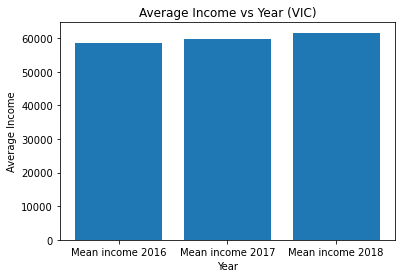

In [132]:
yearly_income = cleaned_VIC_Income[['Mean income 2016', 'Mean income 2017','Mean income 2018']].mean(axis=0)
plt.bar(['Mean income 2016', 'Mean income 2017','Mean income 2018'],yearly_income)
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title("Average Income vs Year (VIC)")

plt.show()

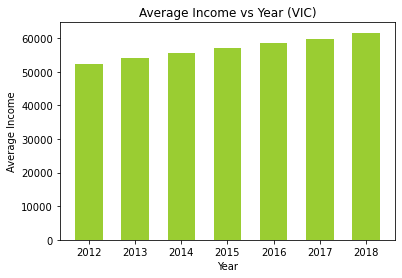

In [187]:
mean_income = cleaned_VIC_Income[['Mean income 2012','Mean income 2013', 'Mean income 2014','Mean income 2015','Mean income 2016', 'Mean income 2017','Mean income 2018']].mean(axis=0)
median_income = cleaned_VIC_Income[['Median income 2012','Median income 2013', 'Median income 2014','Median income 2015','Median income 2016', 'Median income 2017','Median income 2018']].mean(axis=0)
x_data=['2012','2013','2014','2015','2016', '2017','2018']

plt.bar(x_data,median_income,color = 'lightskyblue',width=0.6)
plt.bar(x_data,mean_income,color = 'yellowgreen',width=0.6)
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title("Average Income vs Year (VIC)")

plt.show()

# df = pd.DataFrame(x_data, columns = [mean_income])
# df.plot(kind = 'bar', grid = True, colormap = 'summer_r')

In [190]:
sampled = cleaned_VIC_Income.sample(n=15, random_state=1) 

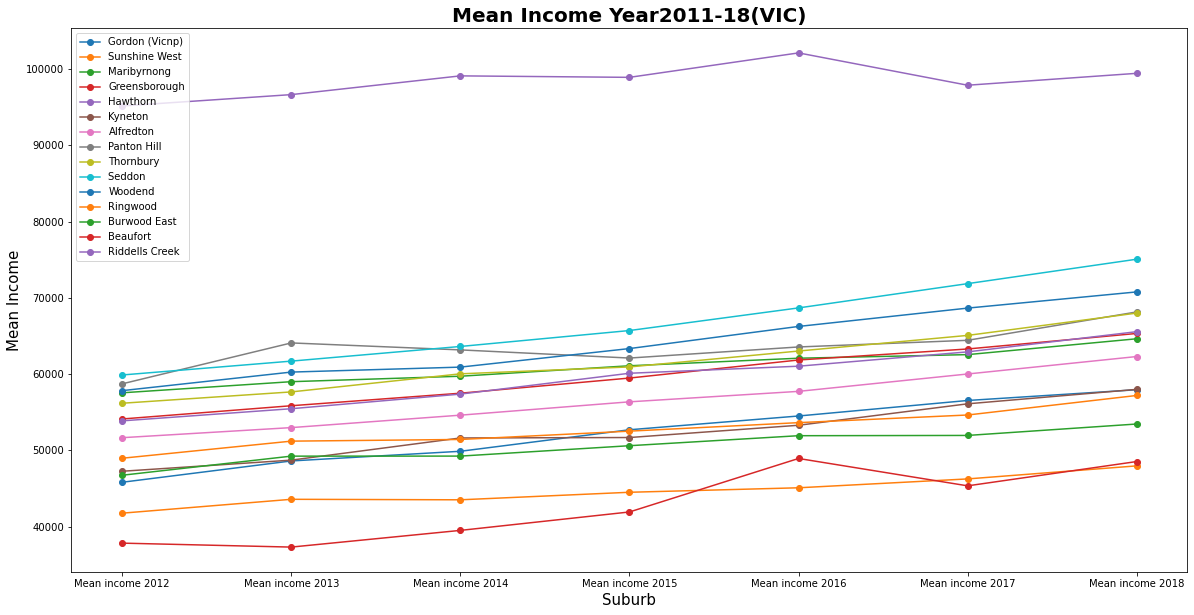

In [191]:
plt.subplots(figsize=(20,10))
for index, row in sampled.iterrows():
    plt.plot(['Mean income 2012', 'Mean income 2013', 'Mean income 2014',
       'Mean income 2015', 'Mean income 2016', 'Mean income 2017',
       'Mean income 2018'],row[['Mean income 2012', 'Mean income 2013', 'Mean income 2014',
       'Mean income 2015', 'Mean income 2016', 'Mean income 2017',
       'Mean income 2018']],"o-",label = row["Suburb"] )
    
plt.xlabel('Suburb',fontsize=15)
plt.ylabel('Mean Income',fontsize=15)
plt.title("Mean Income Year2011-18(VIC)",fontsize=20,fontweight="bold")
plt.legend()
plt.show()

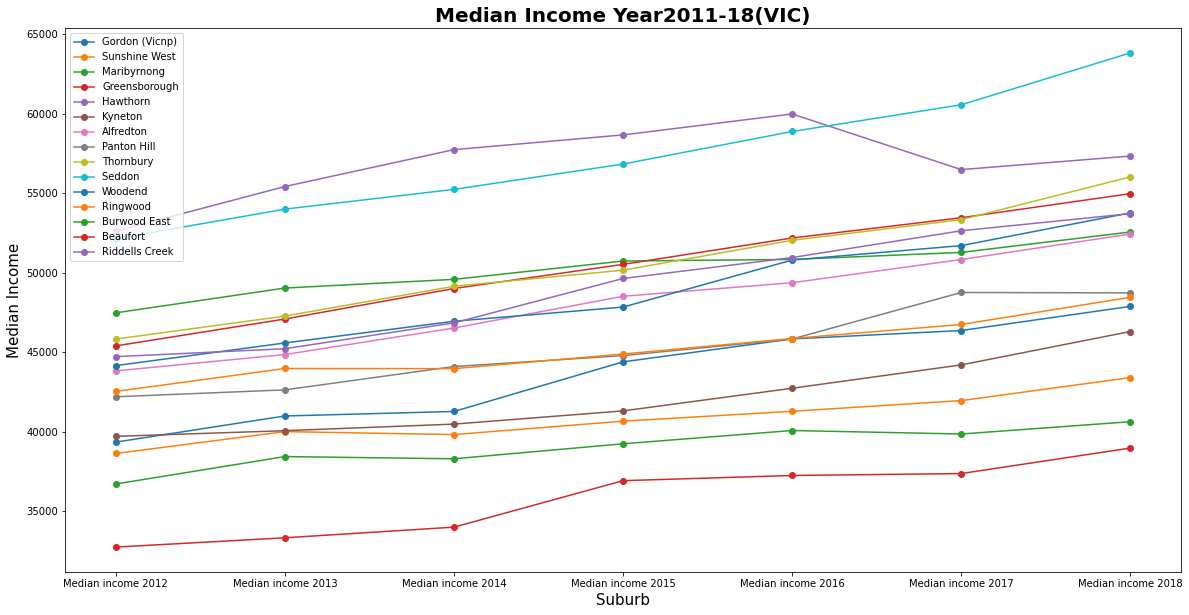

In [192]:
plt.subplots(figsize=(20,10))
for index, row in sampled.iterrows():
    plt.plot(['Median income 2012', 'Median income 2013', 'Median income 2014',
       'Median income 2015', 'Median income 2016', 'Median income 2017',
       'Median income 2018'],row[['Median income 2012', 'Median income 2013', 'Median income 2014',
       'Median income 2015', 'Median income 2016', 'Median income 2017',
       'Median income 2018']],"o-",label = row["Suburb"] )
    
plt.xlabel('Suburb',fontsize=15)
plt.ylabel('Median Income',fontsize=15)
plt.title("Median Income Year2011-18(VIC)",fontsize=20,fontweight="bold")
plt.legend()
plt.show()

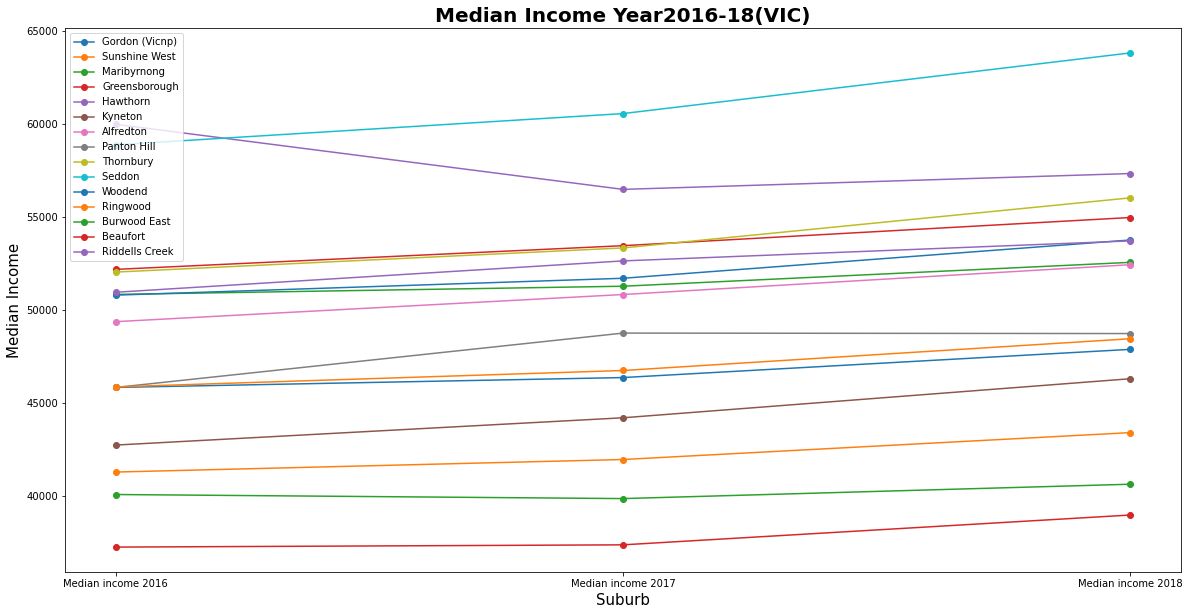

In [193]:
plt.subplots(figsize=(20,10))
for index, row in sampled.iterrows():
    plt.plot([ 'Median income 2016', 'Median income 2017',
       'Median income 2018'],row[['Median income 2016', 'Median income 2017',
       'Median income 2018']],"o-",label = row["Suburb"] )
    
plt.xlabel('Suburb',fontsize=15)
plt.ylabel('Median Income',fontsize=15)
plt.title("Median Income Year2016-18(VIC)",fontsize=20,fontweight="bold")
plt.legend()
plt.show()

# Clustering

In [197]:
cleaned_VIC_Income["Income-Mean-2016-18"] = cleaned_VIC_Income[['Mean income 2016', 'Mean income 2017', 'Mean income 2018']].mean(axis=1)

<ipython-input-197-ade9d3851741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_VIC_Income["Income-Mean-2016-18"] = cleaned_VIC_Income[['Mean income 2016', 'Mean income 2017', 'Mean income 2018']].mean(axis=1)


In [198]:
cleaned_VIC_Income

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Median income 2018,Mean income 2012,Mean income 2013,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018,Income-Mean,Income-Mean-2016-18
0,Abbotsford,3265,3522,4629,5200,5625,6365,6439,35,34,...,61476,63043,65938,63884,65878,69588,72002,75384,72324.666667,72324.666667
1,Airport West,3923,3947,4082,4251,4298,4480,4639,41,41,...,55912,50527,52510,55197,56238,58809,60758,63576,61047.666667,61047.666667
2,Albert Park,9679,9871,10064,10519,10447,11003,11491,41,42,...,66627,105550,107915,112261,111338,115049,115981,117352,116127.333333,116127.333333
3,Alexandra,3376,3413,3405,3480,3564,3644,3735,49,50,...,37890,38781,38557,39171,41922,44044,45642,46205,45297.000000,45297.000000
4,Alfredton,5098,5372,5760,6225,6718,7124,7558,42,42,...,52448,51670,52993,54625,56374,57747,60026,62315,60029.333333,60029.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Yarram,2795,2738,2726,2759,2721,2750,2787,50,50,...,38003,43052,43208,55079,54112,45827,44023,45840,45230.000000,45230.000000
419,Yarraville,7979,8144,8365,8657,9051,9239,9495,39,39,...,66233,63528,66799,68348,70906,73604,76250,79585,76479.666667,76479.666667
420,Yarrawonga,3712,3686,3770,3881,3938,4108,4210,46,47,...,40572,42769,43621,46131,46270,46072,47691,48313,47358.666667,47358.666667
421,Yarriambiack,3813,3771,3737,3651,3416,3600,3602,50,50,...,46030,46367,52964,53491,40333,38594,50845,58228,49222.333333,49222.333333


Suburb                    Yea
Earners 2012            17612
Earners 2013            18408
Earners 2014            19158
Earners 2015            20133
Earners 2016            20622
Earners 2017            24075
Earners 2018            26083
Median age 2012            56
Median age 2013            57
Median age 2014            59
Median age 2015            61
Median age 2016            59
Median age 2017            57
Median age 2018            57
Median income 2012      64531
Median income 2013      66270
Median income 2014      70174
Median income 2015      70023
Median income 2016      73408
Median income 2017      73296
Median income 2018      74967
Mean income 2012       148362
Mean income 2013       146406
Mean income 2014       161878
Mean income 2015       164156
Mean income 2016       224340
Mean income 2017       175696
Mean income 2018       177645
Income-Mean            173815
Income-Mean-2016-18    173815
dtype: object

In [ ]:
plt.subplots(figsize=(10,2))

plt.scatter(cleaned_VIC_Income["Income-Median-2016-18"],[0] * len(cleaned_VIC_Income["Income-Median-2016-18"]),1)
    
#plt.xlabel('Mean Income')
#plt.ylabel('2016 Income')
plt.title("VIC Median Yearly-Income Clustering")
plt.show()

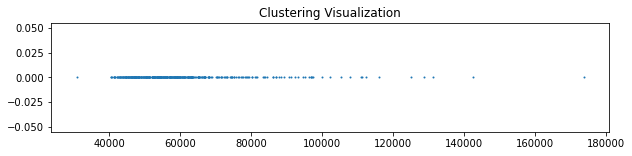

In [201]:
plt.subplots(figsize=(10,2))

plt.scatter(cleaned_VIC_Income["Income-Mean"],[0] * len(cleaned_VIC_Income["Income-Mean"]),1)
    
#plt.xlabel('Mean Income')
#plt.ylabel('2016 Income')
plt.title("Clustering Mean Visualization")
plt.show()

# Income Increasing Rate

In [202]:
cleaned_VIC_Income["IncomeR-16-17"] = (cleaned_VIC_Income["Mean income 2017"]-cleaned_VIC_Income["Mean income 2016"])/cleaned_VIC_Income["Mean income 2016"]
cleaned_VIC_Income["IncomeR-17-18"] = (cleaned_VIC_Income["Mean income 2018"]-cleaned_VIC_Income["Mean income 2017"])/cleaned_VIC_Income["Mean income 2017"]
cleaned_VIC_Income["IncomeR-16-18"] = (cleaned_VIC_Income["Mean income 2018"]-cleaned_VIC_Income["Mean income 2016"])/cleaned_VIC_Income["Mean income 2016"]

<ipython-input-202-bc511b08d425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_VIC_Income["IncomeR-16-17"] = (cleaned_VIC_Income["Mean income 2017"]-cleaned_VIC_Income["Mean income 2016"])/cleaned_VIC_Income["Mean income 2016"]
<ipython-input-202-bc511b08d425>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_VIC_Income["IncomeR-17-18"] = (cleaned_VIC_Income["Mean income 2018"]-cleaned_VIC_Income["Mean income 2017"])/cleaned_VIC_Income["Mean income 2017"]
<ipython-input-202-bc511b08d425>:3

In [203]:
cleaned_VIC_Income

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018,Income-Mean,Income-Mean-2016-18,IncomeR-16-17,IncomeR-17-18,IncomeR-16-18
0,Abbotsford,3265,3522,4629,5200,5625,6365,6439,35,34,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
1,Airport West,3923,3947,4082,4251,4298,4480,4639,41,41,...,55197,56238,58809,60758,63576,61047.666667,61047.666667,0.0331412,0.0463807,0.081059
2,Albert Park,9679,9871,10064,10519,10447,11003,11491,41,42,...,112261,111338,115049,115981,117352,116127.333333,116127.333333,0.0081009,0.0118209,0.0200176
3,Alexandra,3376,3413,3405,3480,3564,3644,3735,49,50,...,39171,41922,44044,45642,46205,45297.000000,45297.000000,0.0362819,0.0123351,0.0490646
4,Alfredton,5098,5372,5760,6225,6718,7124,7558,42,42,...,54625,56374,57747,60026,62315,60029.333333,60029.333333,0.0394653,0.0381335,0.0791037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Yarram,2795,2738,2726,2759,2721,2750,2787,50,50,...,55079,54112,45827,44023,45840,45230.000000,45230.000000,-0.0393654,0.0412739,0.000283676
419,Yarraville,7979,8144,8365,8657,9051,9239,9495,39,39,...,68348,70906,73604,76250,79585,76479.666667,76479.666667,0.0359491,0.0437377,0.0812592
420,Yarrawonga,3712,3686,3770,3881,3938,4108,4210,46,47,...,46131,46270,46072,47691,48313,47358.666667,47358.666667,0.0351406,0.0130423,0.0486413
421,Yarriambiack,3813,3771,3737,3651,3416,3600,3602,50,50,...,53491,40333,38594,50845,58228,49222.333333,49222.333333,0.317433,0.145206,0.508732


In [204]:
top10 = cleaned_VIC_Income.sort_values(by=["IncomeR-16-18"],ascending=False)[:10]

In [212]:
top10[['Suburb','Median age 2015','Median age 2016','Median age 2017','Median age 2018','IncomeR-16-18']]

,Suburb,Median age 2015,Median age 2016,Median age 2017,Median age 2018,IncomeR-16-18
185,Horsham Region,48,49,48,48,0.581974
279,Nhill Region,50,50,50,49,0.515426
421,Yarriambiack,51,51,51,51,0.508732
59,Buloke,51,51,50,51,0.462677
321,Rockbank,43,41,41,35,0.372023
220,Loddon,51,51,51,51,0.29824
346,Southern Grampians,50,50,50,50,0.253954
350,St Arnaud,50,50,50,50,0.240501
20,Bacchus Marsh Region,46,46,46,45,0.200829
364,Swan Hill Region,46,47,47,47,0.189719


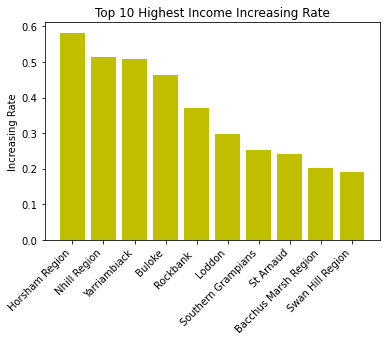

In [218]:
plt.bar(top10["Suburb"], top10["IncomeR-16-18"],color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Increasing Rate')
plt.title('Top 10 Highest Income Increasing Rate')
plt.xticks(rotation=45,ha='right')

plt.show()

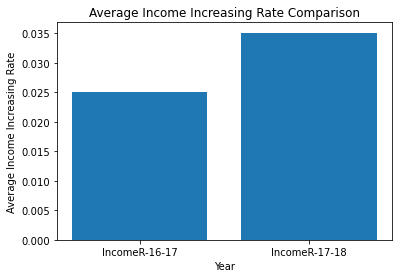

In [220]:
yearly_income = cleaned_VIC_Income[["IncomeR-16-17","IncomeR-17-18"]].mean(axis=0)
plt.bar(["IncomeR-16-17","IncomeR-17-18"],yearly_income)
plt.xlabel('Year')
plt.ylabel('Average Income Increasing Rate')
plt.title("Average Income Increasing Rate Comparison")

plt.show()

# Top 10 Income

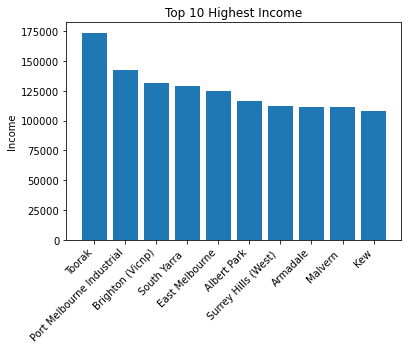

In [221]:
top10 = cleaned_VIC_Income.sort_values(by=["Income-Mean"],ascending=False)[:10]
plt.bar(top10["Suburb"], top10["Income-Mean"])

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Income')
plt.title('Top 10 Highest Income')
plt.xticks(rotation=45,ha='right')

plt.show()

In [223]:
top10["IncomeR-16-17"] = (top10["Mean income 2017"]-top10["Mean income 2016"])/top10["Mean income 2016"]
top10["IncomeR-17-18"] = (top10["Mean income 2018"]-top10["Mean income 2017"])/top10["Mean income 2017"]
top10["IncomeR-16-18"] = (top10["Mean income 2018"]-top10["Mean income 2016"])/top10["Mean income 2016"]

In [224]:
top10

,Suburb,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,Median age 2013,...,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018,Income-Mean,Income-Mean-2016-18,IncomeR-16-17,IncomeR-17-18,IncomeR-16-18
374,Toorak,9502,9612,9890,10112,9917,10096,10250,49,49,...,161878,164156,168104,175696,177645,173815.000000,173815.000000,0.0451625,0.011093,0.0567565
306,Port Melbourne Industrial,96,110,105,107,133,236,385,40,38,...,83268,132566,224340,116157,87256,142584.333333,142584.333333,-0.482228,-0.24881,-0.611055
51,Brighton (Vicnp),14390,14458,15006,15426,15761,16039,16312,49,50,...,126031,126939,128527,128678,136482,131229.000000,131229.000000,0.00117485,0.0606475,0.0618936
344,South Yarra,4006,4048,4121,4167,4289,4720,5182,38,39,...,127605,122899,125079,125363,135941,128794.333333,128794.333333,0.00227057,0.084379,0.0868411
126,East Melbourne,3494,3520,3563,3599,3631,3792,3823,38,38,...,116888,114762,122960,124057,128069,125028.666667,125028.666667,0.0089216,0.03234,0.0415501
2,Albert Park,9679,9871,10064,10519,10447,11003,11491,41,42,...,112261,111338,115049,115981,117352,116127.333333,116127.333333,0.0081009,0.0118209,0.0200176
362,Surrey Hills (West),10327,10425,10478,10672,10825,10940,11079,47,48,...,105272,105527,111065,110484,115344,112297.666667,112297.666667,-0.00523117,0.0439883,0.038527
13,Armadale,5843,5929,5988,6197,6068,6486,6846,41,41,...,106695,109684,113429,112884,107488,111267.000000,111267.000000,-0.00480477,-0.0478013,-0.0523764
228,Malvern,12800,13016,13120,13436,13330,13978,14381,42,42,...,104655,107213,110207,108873,114118,111066.000000,111066.000000,-0.0121045,0.0481754,0.0354878
197,Kew,15126,15368,15573,16131,16559,16786,17113,45,45,...,103845,103505,106035,108682,108907,107874.666667,107874.666667,0.0249635,0.00207026,0.0270854


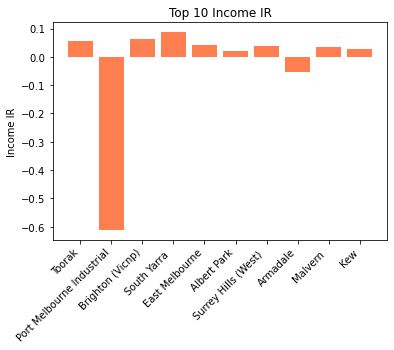

In [264]:
top10IR = top10.sort_values(by=["IncomeR-16-18"],ascending=False)[:10]
plt.bar(top10["Suburb"], top10["IncomeR-16-18"],color='coral')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Income IR')
plt.title('Top 10 Income IR')
plt.xticks(rotation=45,ha='right')

plt.show()

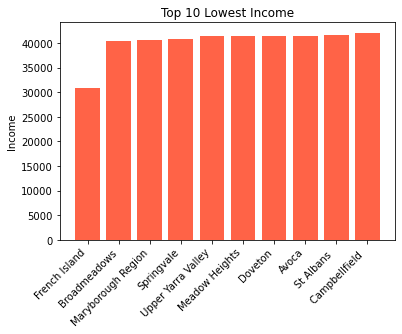

In [263]:
lowest10 = cleaned_VIC_Income.sort_values(by=["Income-Mean"],ascending=True)[:10]
plt.bar(lowest10["Suburb"], lowest10["Income-Mean"],color='tomato')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Income')
plt.title('Top 10 Lowest Income')
plt.xticks(rotation=45,ha='right')


plt.show()

# Housing Data

In [236]:
house_full = pd.concat([house1,house2])

In [237]:
house_full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067.0,Northern Metropolitan,...,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067.0,Northern Metropolitan,...,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067.0,Northern Metropolitan,...,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040.0,Western Metropolitan,...,7.5,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042.0,Western Metropolitan,...,10.4,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
house_full["Date"] = pd.to_datetime(house_full["Date"])
house_full["Month"] = pd.DatetimeIndex(house_full['Date']).month
house_full["Year"] = pd.DatetimeIndex(house_full['Date']).year
house_full["YM"] = house_full["Year"].astype(str) +"-"+ house_full["Month"].astype(str) 

In [239]:
grouped = house_full.groupby(["YM"])

In [240]:
grouped.describe().sort_values(["YM"]).head()

# only 157 suburbs contain in both datasets

Rooms                                                 Price  \
          count      mean       std  min  25%  50%  75%   max   count   
YM                                                                      
2016-1     20.0  3.700000  0.978721  2.0  3.0  4.0  4.0   6.0    12.0   
2016-10  3604.0  3.038013  0.998721  1.0  2.0  3.0  4.0  10.0  2791.0   
2016-11  2691.0  3.088071  0.997418  1.0  2.0  3.0  4.0  10.0  2112.0   
2016-12  1449.0  3.013112  0.955773  1.0  2.0  3.0  4.0   6.0  1135.0   
2016-3   2100.0  3.055714  0.964961  1.0  2.0  3.0  4.0   7.0  1643.0   

                       ... Month          Year                               \
                 mean  ...   75%   max   count    mean  std     min     25%   
YM                     ...                                                    
2016-1   8.275000e+05  ...   1.0   1.0    20.0  2016.0  0.0  2016.0  2016.0   
2016-10  1.058173e+06  ...  10.0  10.0  3604.0  2016.0  0.0  2016.0  2016.0   
2016-11  1.083704e+06  ...  11.0  11.0  2691.0  2016.0  0.0  2016.0  2016.0   
2016-12  1.017565e+06  ...  12.0  12.0  1449.0  2016.0  0.0  2016.0  2016.0   
2016-3   1.105092e+06  ...   3.0   3.0  2100.0  2016.0  0.0  2016.0  2016.0   

                                 
            50%     75%     max  
YM                               
2016-1   2016.0  2016.0  2016.0  
2016-10  2016.0  2016.0  2016.0  
2016-11  2016.0  2016.0  2016.0  
2016-12  2016.0  2016.0  2016.0  
2016-3   2016.0  2016.0  2016.0  

[5 rows x 120 columns]

# 3.1 Data Cleaning

In [242]:
house_full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Month', 'Year',
       'YM'],
      dtype='object')

In [243]:
house_full = house_full.drop(columns=['Rooms','Method', 'SellerG', 'Lattitude', 'Longtitude',"Distance"])

In [244]:
house_full

,Suburb,Address,Type,Price,Date,Postcode,Regionname,Propertycount,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Month,Year,YM
0,Abbotsford,49 Lithgow St,h,1490000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
1,Abbotsford,59A Turner St,h,1220000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
2,Abbotsford,119B Yarra St,h,1420000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
3,Aberfeldie,68 Vida St,h,1515000.0,2017-01-04,3040.0,Western Metropolitan,1543.0,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
4,Airport West,92 Clydesdale Rd,h,670000.0,2017-01-04,3042.0,Western Metropolitan,3464.0,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,1480000.0,2018-02-24,3013.0,Western Metropolitan,6543.0,Maribyrnong City Council,4.0,1.0,3.0,593.0,NaN,NaN,2,2018,2018-2
34853,Yarraville,29A Murray St,h,888000.0,2018-02-24,3013.0,Western Metropolitan,6543.0,Maribyrnong City Council,2.0,2.0,1.0,98.0,104.0,2018.0,2,2018,2018-2
34854,Yarraville,147A Severn St,t,705000.0,2018-02-24,3013.0,Western Metropolitan,6543.0,Maribyrnong City Council,2.0,1.0,2.0,220.0,120.0,2000.0,2,2018,2018-2
34855,Yarraville,12/37 Stephen St,h,1140000.0,2018-02-24,3013.0,Western Metropolitan,6543.0,Maribyrnong City Council,NaN,NaN,NaN,NaN,NaN,NaN,2,2018,2018-2


In [245]:
house_full = house_full[house_full["Type"]=="h"]
house_full = house_full[house_full["Price"].notna()]

## 3.2 Visualization

In [246]:
house_full["Price"].describe()

count    5.263300e+04
mean     1.143272e+06
std      6.573909e+05
min      1.310000e+05
25%      7.050000e+05
50%      9.600000e+05
75%      1.385000e+06
max      1.120000e+07
Name: Price, dtype: float64

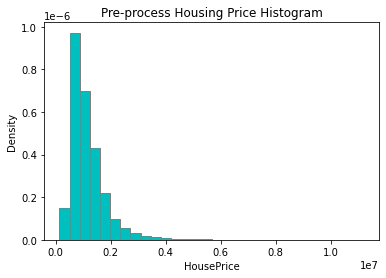

In [248]:
plt.hist(house_full["Price"], 30, density=True,edgecolor='grey',color='c')
plt.xlabel('HousePrice')
plt.ylabel('Density')
plt.title("Pre-process Housing Price Histogram")

# Tweak spacing to prevent clipping of ylabel
plt.show()

In [ ]:
plt.hist(house_full["Price"], 30, edgecolor='black',color='g',density=True)
plt.xlabel('HousePrice')
plt.ylabel('Density')
plt.title("Pre-process Price Histogram",bold)

# Tweak spacing to prevent clipping of ylabel
plt.show()

## 3.3 Z-score remove outliers

In [250]:
from scipy import stats
import numpy as np

In [251]:
removed_house_full = house_full[(np.abs(stats.zscore(house_full["Price"])) < 3)]
removed_house_full.head()

,Suburb,Address,Type,Price,Date,Postcode,Regionname,Propertycount,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Month,Year,YM
0,Abbotsford,49 Lithgow St,h,1490000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
1,Abbotsford,59A Turner St,h,1220000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
2,Abbotsford,119B Yarra St,h,1420000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
3,Aberfeldie,68 Vida St,h,1515000.0,2017-01-04,3040.0,Western Metropolitan,1543.0,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1
4,Airport West,92 Clydesdale Rd,h,670000.0,2017-01-04,3042.0,Western Metropolitan,3464.0,Moonee Valley City Council,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,2017-1


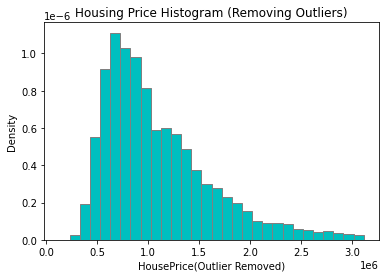

In [252]:
plt.hist(removed_house_full["Price"], 30, density=True,edgecolor='grey',color='c')
plt.xlabel('HousePrice(Outlier Removed)')
plt.ylabel('Density')
plt.title("Housing Price Histogram (Removing Outliers)")

# Tweak spacing to prevent clipping of ylabel
plt.show()

In [253]:
yearly_house = removed_house_full.groupby(by="Year").describe()["Price"]["mean"]

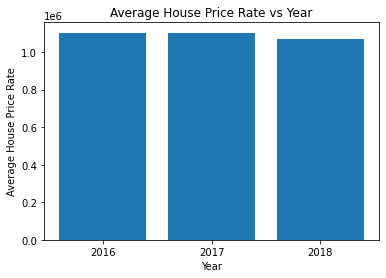

In [254]:
yearly_houseprice = yearly_house
plt.bar(yearly_house.index,yearly_houseprice)


plt.xlabel('Year')
plt.xticks(yearly_house.index)
plt.ylabel('Average House Price Rate')
plt.title("Average House Price Rate vs Year")

plt.show()

## 3.4 Grouping By Suburb

In [255]:
removed_grouped = removed_house_full.groupby("Suburb").describe()

In [256]:
top10_expensive = removed_grouped["Price"]["mean"].sort_values(ascending=False)[:10]
top10_expensive_label = removed_grouped["Price"]["mean"].sort_values(ascending=False).index[:10]
top10_cheap = removed_grouped["Price"]["mean"].sort_values(ascending=True)[:10]
top10_cheap_label = removed_grouped["Price"]["mean"].sort_values(ascending=True).index[:10]

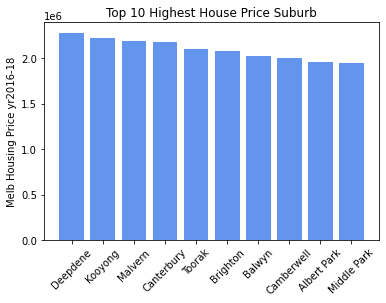

In [272]:
plt.bar(top10_expensive_label, top10_expensive,color= 'cornflowerblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Melb Housing Price yr2016-18')
plt.title('Top 10 Highest House Price Suburb')
plt.xticks(rotation=45)


plt.show()

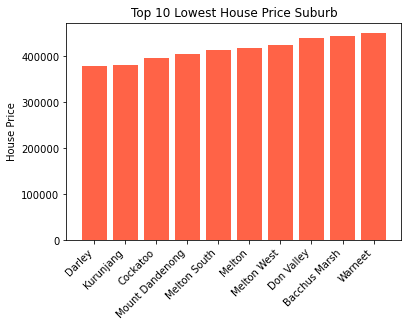

In [262]:
plt.bar(top10_cheap_label, top10_cheap,color='tomato')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('House Price')
plt.title('Top 10 Lowest House Price Suburb')
plt.xticks(rotation=45,ha='right')


plt.show()

## 3.5 House features Visualization

In [273]:
house_feature = house_full[house_full["Bedroom2"].notna() & 
                           house_full["Bathroom"].notna()& 
                           house_full["Car"].notna() & 
                           house_full["Landsize"].notna()& 
                           house_full["BuildingArea"].notna() & 
                           house_full["YearBuilt"].notna()]

In [274]:
print(house_feature["Bedroom2"].describe())
print("++++++")
print(house_feature["Bathroom"].describe())
print("++++++")
print(house_feature["Car"].describe())
print("++++++")
print(house_feature["Landsize"].describe())
print("++++++")
print(house_feature["BuildingArea"].describe())
print("++++++")
print(house_feature["YearBuilt"].describe())

count    6628.000000
mean        3.365118
std         0.854109
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: Bedroom2, dtype: float64
++++++
count    6628.000000
mean        1.733404
std         0.747807
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: Bathroom, dtype: float64
++++++
count    6628.000000
mean        1.837508
std         1.043493
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: Car, dtype: float64
++++++
count     6628.000000
mean       565.362855
std        881.761304
min          0.000000
25%        353.000000
50%        561.000000
75%        672.000000
max      42800.000000
Name: Landsize, dtype: float64
++++++
count    6628.000000
mean      166.837744
std        89.835663
min         0.000000
25%       115.000000
50%       147.000000
75%       196.000000
max      3112.000000
Name:

In [275]:
house_feature_reduced = house_feature[["Price","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Suburb"]]

Text(0.5, 1.0, 'Landsize')

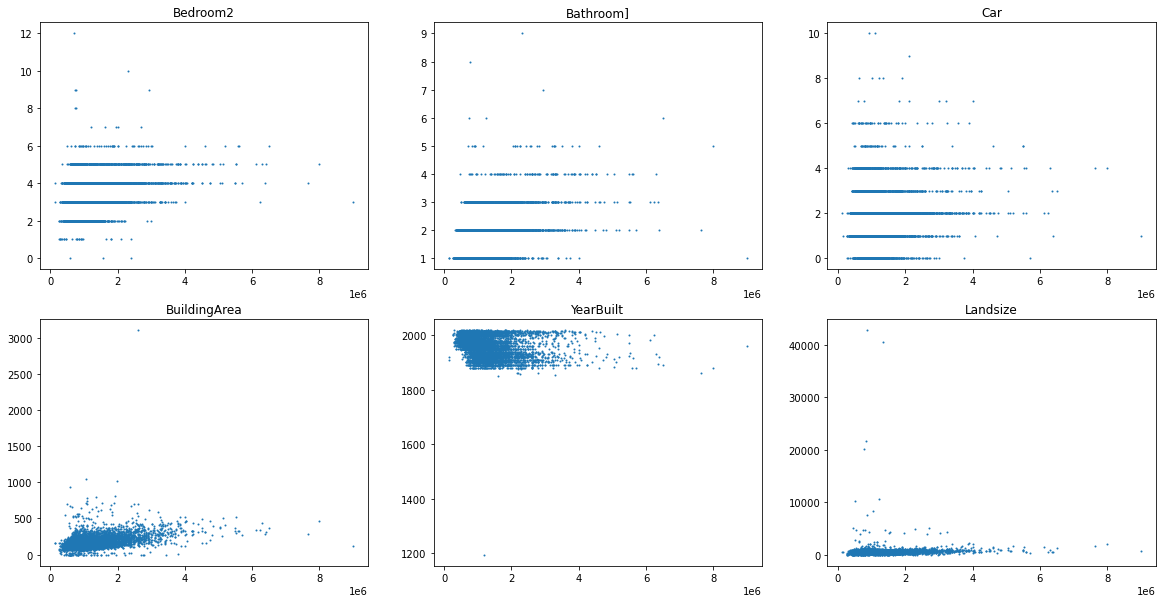

In [276]:
fig, axs = plt.subplots(2, 3,figsize = (20,10))
axs[0, 0].scatter(house_feature_reduced["Price"],house_feature_reduced["Bedroom2"],1)
axs[0, 0].set_title('Bedroom2')
axs[0, 1].scatter(house_feature_reduced["Price"],house_feature_reduced["Bathroom"],1)
axs[0, 1].set_title('Bathroom]')
axs[0, 2].scatter(house_feature_reduced["Price"], house_feature_reduced["Car"],1)
axs[0, 2].set_title('Car')
axs[1, 0].scatter(house_feature_reduced["Price"],house_feature_reduced["BuildingArea"],1)
axs[1, 0].set_title('BuildingArea')
axs[1, 1].scatter(house_feature_reduced["Price"],house_feature_reduced["YearBuilt"],1)
axs[1, 1].set_title('YearBuilt')
axs[1, 2].scatter(house_feature_reduced["Price"], house_feature_reduced["Landsize"],1)
axs[1, 2].set_title('Landsize')
# axs[1, 2].scatter(house_feature_reduced["Price"], house_feature_reduced["Suburb"])
# axs[1, 2].set_title('Suburb')


## Correlation

In [277]:
house_feature_reduced.corr()

,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Price,1.000000,0.325842,0.412554,0.107952,0.050908,0.431125,-0.268341
Bedroom2,0.325842,1.000000,0.615481,0.312245,0.138467,0.511985,0.211757
Bathroom,0.412554,0.615481,1.000000,0.252526,0.088863,0.525982,0.264231
Car,0.107952,0.312245,0.252526,1.000000,0.157703,0.239981,0.241867
Landsize,0.050908,0.138467,0.088863,0.157703,1.000000,0.102339,0.081449
BuildingArea,0.431125,0.511985,0.525982,0.239981,0.102339,1.000000,0.186021
YearBuilt,-0.268341,0.211757,0.264231,0.241867,0.081449,0.186021,1.000000


In [278]:
house_feature_reduced

,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Suburb
2,1035000.0,2.0,1.0,0.0,156.0,79.0,1900.0,Abbotsford
4,1465000.0,3.0,2.0,0.0,134.0,150.0,1900.0,Abbotsford
6,1600000.0,3.0,1.0,2.0,120.0,142.0,2014.0,Abbotsford
11,1876000.0,4.0,2.0,0.0,245.0,210.0,1910.0,Abbotsford
14,1636000.0,2.0,1.0,2.0,256.0,107.0,1890.0,Abbotsford
...,...,...,...,...,...,...,...,...
34837,2020000.0,5.0,3.0,2.0,450.0,241.0,2015.0,Williamstown
34847,500000.0,3.0,2.0,2.0,383.0,118.0,2016.0,Wollert
34849,570000.0,3.0,2.0,2.0,404.0,158.0,2012.0,Wollert
34853,888000.0,2.0,2.0,1.0,98.0,104.0,2018.0,Yarraville


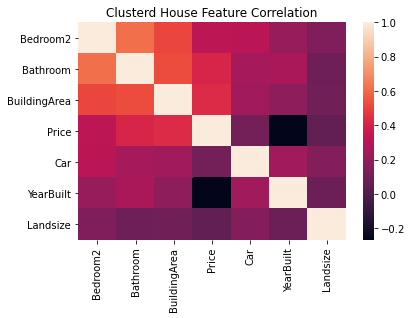

In [279]:
sns.heatmap(cluster_corr(house_feature_reduced.corr()))
plt.title("Clusterd House Feature Correlation")
plt.show()

# 4. Combined Income and House Price

In [ ]:
removed_house_full

In [280]:
merged= pd.merge(removed_house_full, cleaned_VIC_Income, on='Suburb')

In [286]:
merged

,Suburb,Address,Type,Price,Date,Postcode,Regionname,Propertycount,CouncilArea,Bedroom2,...,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018,Income-Mean,Income-Mean-2016-18,IncomeR-16-17,IncomeR-17-18,IncomeR-16-18
0,Abbotsford,49 Lithgow St,h,1490000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
1,Abbotsford,59A Turner St,h,1220000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
2,Abbotsford,119B Yarra St,h,1420000.0,2017-01-04,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
3,Abbotsford,256 Langridge St,h,1350000.0,2017-01-07,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
4,Abbotsford,85 Turner St,h,1480000.0,2016-03-12,3067.0,Northern Metropolitan,4019.0,Yarra City Council,NaN,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27724,Southbank,85 Montague St,h,700000.0,2016-06-18,3006.0,Southern Metropolitan,8400.0,Melbourne City Council,3.0,...,74154,73998,75285,72915,73634,73944.666667,73944.666667,-0.0314804,0.0098608,-0.02193
27725,Cranbourne South,165 Browns Rd,h,1320000.0,2018-03-24,3977.0,South-Eastern Metropolitan,615.0,Casey City Council,NaN,...,55209,57295,59079,60548,62305,60644.000000,60644.000000,0.024865,0.0290183,0.0546049
27726,Cranbourne South,173 Browns Rd,h,555000.0,2016-07-30,3977.0,South-Eastern Metropolitan,615.0,Casey City Council,NaN,...,55209,57295,59079,60548,62305,60644.000000,60644.000000,0.024865,0.0290183,0.0546049
27727,Melbourne,60 Hayward La,h,1630000.0,2017-02-25,3000.0,Northern Metropolitan,17496.0,Melbourne City Council,NaN,...,57011,53183,53292,51261,51528,52027.000000,52027.000000,-0.0381108,0.00520864,-0.0331007


In [287]:
incomelist = []
for index, row in merged.iterrows():
    year = "Mean income "+str(row["Year"])
    incomelist.append(row[year])

In [288]:
merged["Income"] = incomelist

In [289]:
merged['Suburb'].nunique()

155

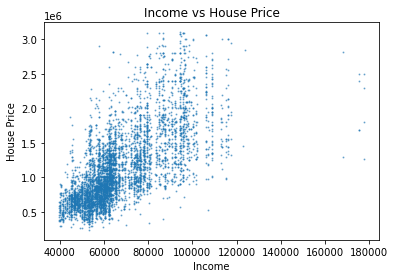

In [290]:
sampled = merged.sample(n=5000, random_state=1)

#plt.subplots(figsize = (20,10))
plt.scatter(sampled["Income"],sampled["Price"],1,alpha = 0.5)
#plt.scatter(merged["Price"],merged["Mean"],2,alpha = 0.5,label = "Mean")
plt.ylabel('House Price')
plt.xlabel('Income')
plt.title("Income vs House Price")

plt.show()

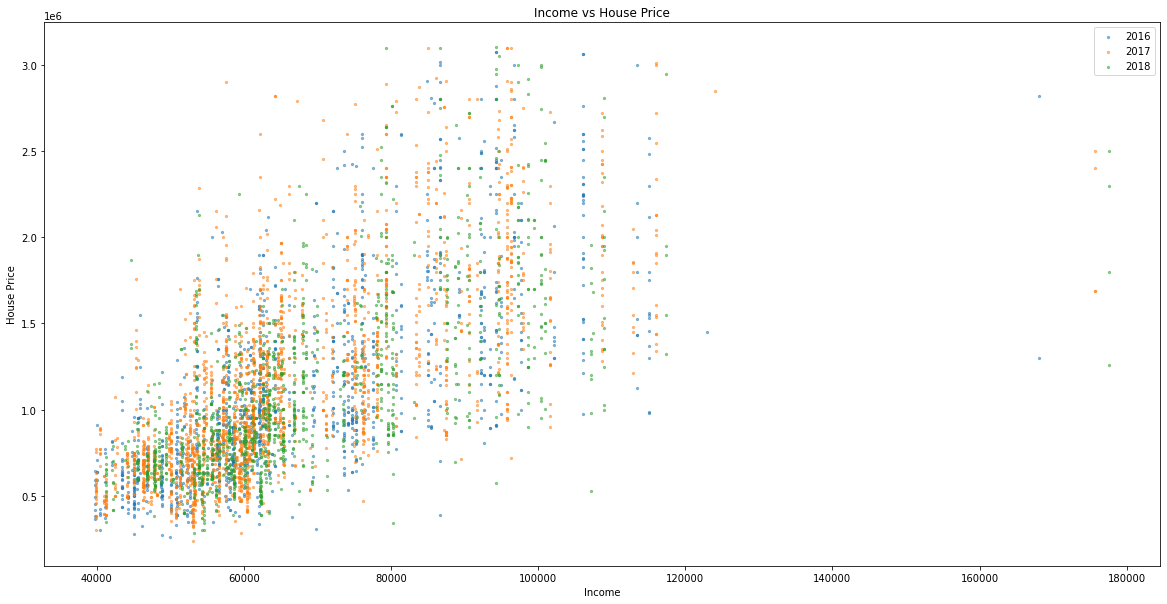

In [291]:
sample_2016 = sampled[sampled["Year"] == 2016]
sample_2017 = sampled[sampled["Year"] == 2017]
sample_2018 = sampled[sampled["Year"] == 2018]

plt.subplots(figsize = (20,10))
plt.scatter(sample_2016["Income"],sample_2016["Price"],5,alpha = 0.5,label = "2016")
plt.scatter(sample_2017["Income"],sample_2017["Price"],5,alpha = 0.5,label = "2017")
plt.scatter(sample_2018["Income"],sample_2018["Price"],5,alpha = 0.5,label = "2018")
#plt.scatter(merged["Price"],merged["Mean"],2,alpha = 0.5,label = "Mean")
plt.ylabel('House Price')
plt.xlabel('Income')
plt.title("Income vs House Price")
plt.legend()
plt.show()

In [292]:
sampled[["Income","Price"]].corr()

,Income,Price
Income,1.000000,0.684282
Price,0.684282,1.000000


# 5. Link Housing Prices with Income

In [293]:
house_price = removed_house_full.groupby("Suburb").describe()["Price"]["mean"]

In [294]:
house_price = pd.DataFrame(house_price)

In [296]:
merged2= pd.merge(house_price,cleaned_VIC_Income , on='Suburb')

In [297]:
merged2

,Suburb,mean,Earners 2012,Earners 2013,Earners 2014,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Median age 2012,...,Mean income 2014,Mean income 2015,Mean income 2016,Mean income 2017,Mean income 2018,Income-Mean,Income-Mean-2016-18,IncomeR-16-17,IncomeR-17-18,IncomeR-16-18
0,Abbotsford,1.221714e+06,3265,3522,4629,5200,5625,6365,6439,35,...,63884,65878,69588,72002,75384,72324.666667,72324.666667,0.0346899,0.0469709,0.0832902
1,Airport West,8.326442e+05,3923,3947,4082,4251,4298,4480,4639,41,...,55197,56238,58809,60758,63576,61047.666667,61047.666667,0.0331412,0.0463807,0.081059
2,Albert Park,1.955922e+06,9679,9871,10064,10519,10447,11003,11491,41,...,112261,111338,115049,115981,117352,116127.333333,116127.333333,0.0081009,0.0118209,0.0200176
3,Altona,1.005401e+06,6886,6965,7126,7403,7610,7910,7942,43,...,58832,60523,63487,65344,69301,66044.000000,66044.000000,0.0292501,0.0605564,0.0915778
4,Altona Meadows,6.640309e+05,10379,10182,10411,10536,10578,10722,10827,40,...,51047,52065,53879,55384,57686,55649.666667,55649.666667,0.027933,0.0415644,0.0706583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Whittlesea,5.292000e+05,4115,4072,4189,4348,4375,4511,4724,44,...,52943,54708,55654,58420,61101,58391.666667,58391.666667,0.0496999,0.0458918,0.0978726
151,Williamstown,1.491425e+06,8806,8933,9141,9309,9534,9706,9996,46,...,79946,82819,85094,87460,90668,87740.666667,87740.666667,0.0278045,0.0366796,0.065504
152,Wollert,5.901921e+05,915,1809,2657,3573,4483,5750,6636,32,...,52564,52166,52280,53211,55656,53715.666667,53715.666667,0.017808,0.0459491,0.0645754
153,Wyndham Vale,4.887228e+05,9624,10116,10573,11204,11446,13064,13931,36,...,51787,52420,52906,54340,56229,54491.666667,54491.666667,0.0271047,0.0347626,0.0628095


In [304]:
merged2[["mean","Earners 2016","Earners 2017","Earners 2018",
     "Median age 2016","Median age 2017","Median age 2018",
"Median income 2016","Median income 2017","Median income 2018",
"Mean income 2016","Mean income 2017","Mean income 2018"]] = merged2[["mean","Earners 2016","Earners 2017","Earners 2018",
     "Median age 2016","Median age 2017","Median age 2018",
"Median income 2016","Median income 2017","Median income 2018",
"Mean income 2016","Mean income 2017","Mean income 2018"]].astype('float')

In [305]:
merged2[["mean","Earners 2016","Earners 2017","Earners 2018",
"Median age 2016","Median age 2017","Median age 2018",
"Median income 2016","Median income 2017","Median income 2018",
"Mean income 2016","Mean income 2017","Mean income 2018"]].corr()

,mean,Earners 2016,Earners 2017,Earners 2018,Median age 2016,Median age 2017,Median age 2018,Median income 2016,Median income 2017,Median income 2018,Mean income 2016,Mean income 2017,Mean income 2018
mean,1.000000,0.221222,0.209010,0.172334,0.216424,0.219866,0.231958,0.521873,0.469422,0.443584,0.800004,0.783545,0.774148
Earners 2016,0.221222,1.000000,0.988579,0.980445,-0.097564,-0.086195,-0.073558,0.068653,0.040719,0.037290,0.148417,0.136140,0.136204
Earners 2017,0.209010,0.988579,1.000000,0.991572,-0.160551,-0.153899,-0.134548,0.054776,0.025991,0.020248,0.131066,0.118579,0.117314
Earners 2018,0.172334,0.980445,0.991572,1.000000,-0.201438,-0.191244,-0.175543,0.033881,0.000771,-0.003313,0.103695,0.089381,0.087925
Median age 2016,0.216424,-0.097564,-0.160551,-0.201438,1.000000,0.991909,0.985050,0.248237,0.281480,0.254112,0.328954,0.346744,0.345913
Median age 2017,0.219866,-0.086195,-0.153899,-0.191244,0.991909,1.000000,0.991554,0.267791,0.298994,0.273382,0.339006,0.355471,0.356037
Median age 2018,0.231958,-0.073558,-0.134548,-0.175543,0.985050,0.991554,1.000000,0.309536,0.340292,0.315594,0.364040,0.381216,0.383644
Median income 2016,0.521873,0.068653,0.054776,0.033881,0.248237,0.267791,0.309536,1.000000,0.987777,0.979515,0.838780,0.845967,0.860026
Median income 2017,0.469422,0.040719,0.025991,0.000771,0.281480,0.298994,0.340292,0.987777,1.000000,0.993980,0.799166,0.814731,0.830828
Median income 2018,0.443584,0.037290,0.020248,-0.003313,0.254112,0.273382,0.315594,0.979515,0.993980,1.000000,0.775055,0.791572,0.811290


# House By Year and Suburb

In [306]:
house_price_year = removed_house_full.groupby(["Suburb","Year"]).describe()
house_price_year = pd.DataFrame(house_price_year["Price"]["mean"])

In [307]:
house_price_year= house_price_year.reset_index(level=[0,1])
flatten = pd.pivot_table(house_price_year,values=['mean'],index=['Suburb'],columns=['Year'],fill_value=np.nan,margins=False)

In [308]:
flatten.columns = flatten.columns.droplevel(0)


In [309]:
flatten = flatten.rename(columns={2016: 'House-2016', 2017: 'House-2017',2018: 'House-2018'})

In [310]:
flatten["HouseR-16-17"] = (flatten["House-2017"]-flatten["House-2016"])/flatten["House-2016"]
flatten["HouseR-17-18"] = (flatten["House-2018"]-flatten["House-2017"])/flatten["House-2017"]
flatten["HouseR-16-18"] = (flatten["House-2018"]-flatten["House-2016"])/flatten["House-2016"]

In [311]:
flatten

Year,House-2016,House-2017,House-2018,HouseR-16-17,HouseR-17-18,HouseR-16-18
Suburb,,,,,,
Abbotsford,1.232889e+06,1.222577e+06,1.197093e+06,-0.008364,-0.020845,-0.029034
Aberfeldie,1.400786e+06,1.605129e+06,1.560000e+06,0.145878,-0.028116,0.113661
Airport West,7.971667e+05,8.450957e+05,8.474681e+05,0.060124,0.002807,0.063100
Albanvale,4.400000e+05,5.423684e+05,5.235000e+05,0.232656,-0.034789,0.189773
Albert Park,1.813129e+06,2.042170e+06,1.999483e+06,0.126324,-0.020903,0.102780
...,...,...,...,...,...,...
Yan Yean,1.415000e+06,NaN,NaN,NaN,NaN,NaN
Yarra Glen,NaN,6.200000e+05,1.170000e+06,NaN,0.887097,NaN
Yarra Junction,NaN,4.550000e+05,NaN,NaN,NaN,NaN


In [313]:
merged3= pd.merge(flatten, cleaned_VIC_Income, on='Suburb')

merged3 = merged3.dropna()

In [314]:
merged3["HouseR-16-18"].describe()

count    145.000000
mean       0.142543
std        0.151653
min       -0.133905
25%        0.048741
50%        0.120991
75%        0.190539
max        0.861176
Name: HouseR-16-18, dtype: float64

In [315]:
merged3[["IncomeR-16-18","Mean income 2016","Mean income 2017","Mean income 2018"]] = merged3[["IncomeR-16-18","Mean income 2016","Mean income 2017","Mean income 2018"]].astype('float')
merged3["IncomeR-16-18"].describe()

count    145.000000
mean       0.050875
std        0.027376
min       -0.052376
25%        0.040133
50%        0.054403
75%        0.067899
max        0.096911
Name: IncomeR-16-18, dtype: float64

In [316]:
top10_House = merged3.sort_values(by = ["HouseR-16-18","IncomeR-16-18"],ascending=False)[:10]
top10_Income = merged3.sort_values(by = ["IncomeR-16-18","HouseR-16-18",],ascending=False)[:10]

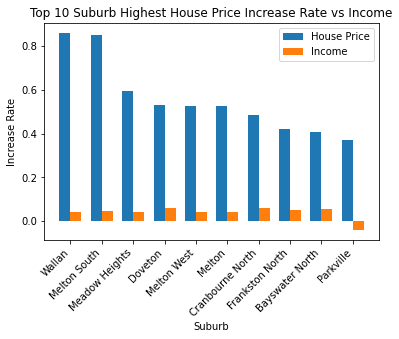

In [317]:
labels = top10_House["Suburb"]
HouseR = top10_House["HouseR-16-18"]
IncomeR = top10_House["IncomeR-16-18"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, HouseR, width, label='House Price')
rects2 = ax.bar(x + width/2, IncomeR, width, label='Income')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation = 45, ha="right")

ax.set_ylabel('Increase Rate')
ax.set_xlabel('Suburb')
ax.set_title('Top 10 Suburb Highest House Price Increase Rate vs Income')
ax.legend()


plt.show()

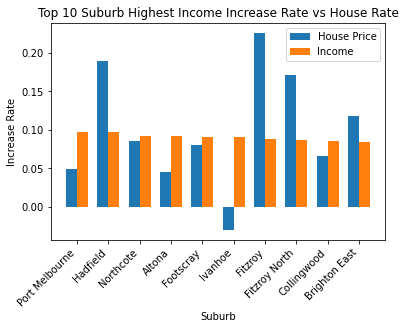

In [318]:
labels = top10_Income["Suburb"]
HouseR = top10_Income["HouseR-16-18"]
IncomeR = top10_Income["IncomeR-16-18"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, HouseR, width, label='House Price')
rects2 = ax.bar(x + width/2, IncomeR, width, label='Income')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation = 45, ha="right")

ax.set_ylabel('Increase Rate')
ax.set_xlabel('Suburb')
ax.set_title('Top 10 Suburb Highest Income Increase Rate vs House Rate')
ax.legend()

plt.show()

In [322]:
merged3["2016"] = merged3["House-2016"]/merged3["Mean income 2016"]
merged3["2017"] = merged3["House-2017"]/merged3["Mean income 2017"]
merged3["2018"] = merged3["House-2018"]/merged3["Mean income 2018"]

In [323]:
best10_2016 = merged3.sort_values(by = ["2016"],ascending=False)[:10]
worst10_2016 = merged3.sort_values(by = ["2016"],ascending=True)[:10]

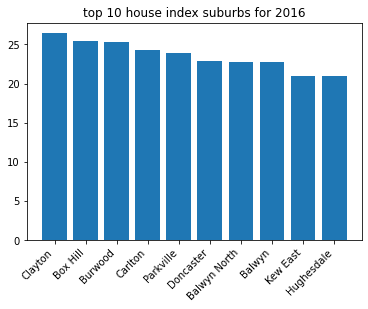

In [324]:
plt.bar(best10_2016["Suburb"], best10_2016["2016"])

plt.xticks(rotation=45,ha='right')
plt.title("top 10 house index suburbs for 2016")
plt.show()

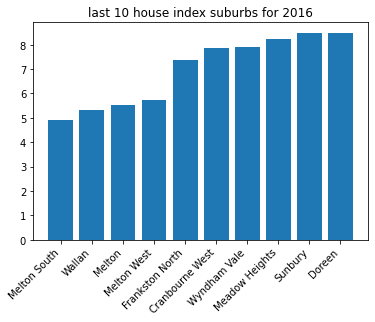

In [325]:
plt.bar(worst10_2016["Suburb"], worst10_2016["2016"])

plt.xticks(rotation=45,ha='right')
plt.title("last 10 house index suburbs for 2016")

plt.show()

In [326]:
best10_2017 = merged3.sort_values(by = ["2017"],ascending=False)[:10]
worst10_2017 = merged3.sort_values(by = ["2017"],ascending=True)[:10]

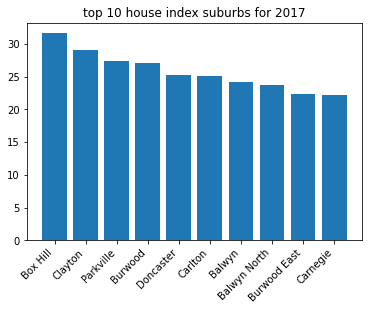

In [327]:
plt.bar(best10_2017["Suburb"], best10_2017["2017"])
plt.title("top 10 house index suburbs for 2017")
plt.xticks(rotation=45,ha='right')

plt.show()

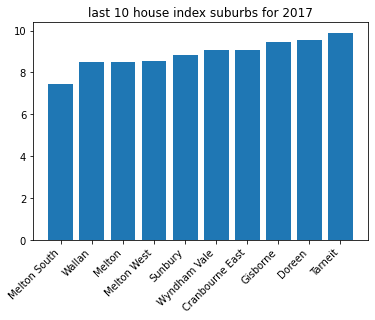

In [328]:
plt.bar(worst10_2017["Suburb"], worst10_2017["2017"])

plt.xticks(rotation=45,ha='right')
plt.title("last 10 house index suburbs for 2017")

plt.show()

In [329]:
best10_2018 = merged3.sort_values(by = ["2018"],ascending=False)[:10]
worst10_2018 = merged3.sort_values(by = ["2018"],ascending=True)[:10]

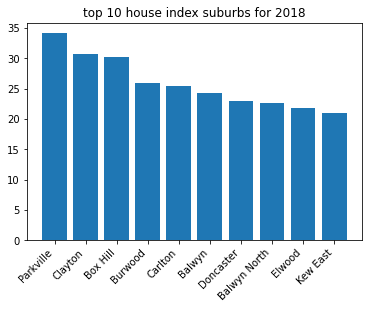

In [330]:
plt.bar(best10_2018["Suburb"], best10_2018["2018"])

plt.xticks(rotation=45,ha='right')
plt.title("top 10 house index suburbs for 2018")
plt.show()

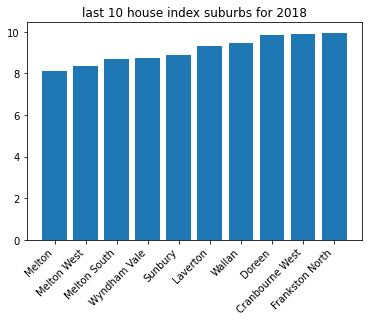

In [331]:
plt.bar(worst10_2018["Suburb"], worst10_2018["2018"])

plt.xticks(rotation=45,ha='right')
plt.title("last 10 house index suburbs for 2018")

plt.show()

In [332]:
merged3["House-Mean"] = merged3[['House-2016','House-2017','House-2018']].mean(axis=1)

In [333]:
merged3["overall"] = merged3["House-Mean"]/merged3["Income-Mean"]

In [334]:
best10_overall = merged3.sort_values(by = ["overall"],ascending=False)[:10]
worst10_overall= merged3.sort_values(by = ["overall"],ascending=True)[:10]

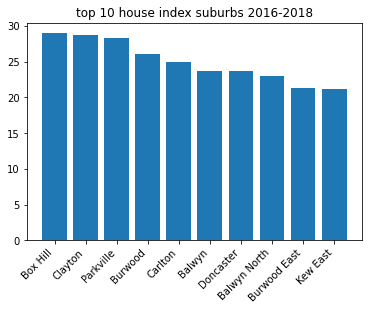

In [335]:
plt.bar(best10_overall["Suburb"], best10_overall["overall"])

plt.xticks(rotation=45,ha='right')
plt.title("top 10 house index suburbs 2016-2018")
plt.show()

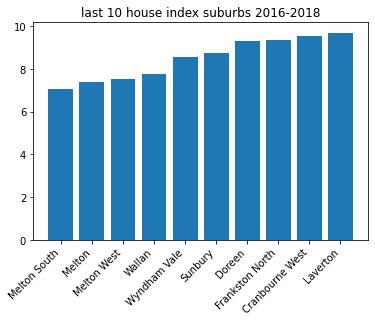

In [336]:
plt.bar(worst10_overall["Suburb"], worst10_overall["overall"])

plt.xticks(rotation=45,ha='right')
plt.title("last 10 house index suburbs 2016-2018")


plt.show()